In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from basics import *
import main_run

In [3]:
def line(k, N):
    y0, x0 = np.sin(2 * np.pi * (k)/N), np.cos(2 * np.pi * (k)/N)
    y1, x1 = np.sin(2 * np.pi * (k+1)/N), np.cos(2 * np.pi * (k+1)/N)
    m = (y1-y0)/(x1-x0)
    c = y0 - m * x0
    return m, c

def a_and_b(k, N):
    m, c = line(k, N)
    a = np.array([1., -m])
    if c > 0:
        b = c
    else:
        a *= -1
        b = -c
    return a, b

def generate_A_and_b(N, d=2):
    A = np.zeros((N, d))
    b = np.zeros(N)
    for k in range(N):
        A[k, :], b[k] = a_and_b(k, N)
    return A, b

def plot_one_line(a, b, xx, xlims, ylims):
    plt.plot(xx, (b-a[0]*xx)/a[1], linewidth=1.)
    axes = plt.gca()
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    axes.grid('on')

def plot_A_b(A, b, xx, xlims, ylims):
    n, d = A.shape
#     for i in range(n):
#         plt.plot(xx, (b[i]-A[i, 0]*xx)/A[i, 1], linewidth=.2, color='k')
#     plt.axhline(0, color='black', linewidth=.5)
#     plt.axvline(0, color='black', linewidth=.5)
    circle1 = plt.Circle((0, 0), 1, color='black', linestyle='--', fill=False)
    axes = plt.gca()
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    axes.grid('on')

    axes.add_artist(circle1)
    
#     plt.show()

In [4]:
np.random.seed(695829)
experiments = 1000
iterations = 1001

# Defining the Polytope
d = 2
r = 0.5
As = []
bs = []

Ns = [64, 2048]
Nvals = len(Ns)
dikin_rvs = np.zeros((Nvals, d, experiments, iterations))
vaidya_rvs = np.zeros((Nvals, d, experiments, iterations))
john_rvs = np.zeros((Nvals, d, experiments, iterations))
for i, N in enumerate(Ns):
    print 'N = %d ' % N
    A, b = generate_A_and_b(N)
    As.append(A)
    bs.append(b)
    dikin_rvs[i,:, :, :] = main_run.run_dikin_walk(experiments, iterations, A, b, r)
    vaidya_rvs[i,:, :, :] = main_run.run_vaidya_walk(experiments, iterations, A, b, r)
    

N = 64 
Experiment Number: 0, Time Taken: 0.02
Experiment Number: 100, Time Taken: 1.03
Experiment Number: 200, Time Taken: 0.88
Experiment Number: 300, Time Taken: 1.32
Experiment Number: 400, Time Taken: 1.19
Experiment Number: 500, Time Taken: 1.05
Experiment Number: 600, Time Taken: 1.06
Experiment Number: 700, Time Taken: 0.98
Experiment Number: 800, Time Taken: 1.28
Experiment Number: 900, Time Taken: 1.02
Experiment Number: 0, Time Taken: 0.03
Experiment Number: 100, Time Taken: 2.01
Experiment Number: 200, Time Taken: 2.21
Experiment Number: 300, Time Taken: 1.87
Experiment Number: 400, Time Taken: 2.15
Experiment Number: 500, Time Taken: 1.74
Experiment Number: 600, Time Taken: 1.81
Experiment Number: 700, Time Taken: 1.92
Experiment Number: 800, Time Taken: 1.76
Experiment Number: 900, Time Taken: 1.65
N = 2048 
Experiment Number: 0, Time Taken: 0.08
Experiment Number: 100, Time Taken: 4.63
Experiment Number: 200, Time Taken: 4.93
Experiment Number: 300, Time Taken: 4.95
Expe

In [6]:
gaussian_rvs = np.random.randn(experiments, d)
gaussian_rvs_norm = np.sqrt(np.sum(gaussian_rvs ** 2, axis = 1)) 
uniform_rvs = gaussian_rvs/gaussian_rvs_norm[:, np.newaxis]

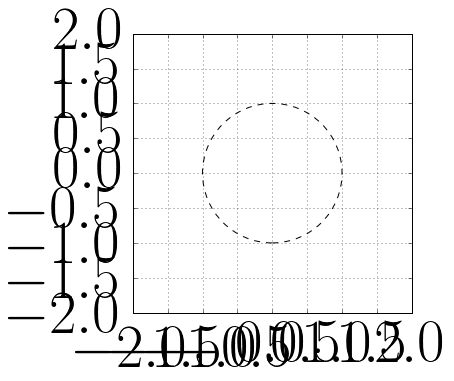

In [8]:
fig = plt.figure(figsize = [5, 5])

N = 5
xlims = np.array([-2., 2])
ylims = np.array([-2, 2])
xx = np.linspace(xlims[0], xlims[1], 21)

A, b = generate_A_and_b(N)
plot_A_b(A, b, xx, xlims, ylims)

# plt.show()

In [65]:
import matplotlib as mpl
import matplotlib.pylab as pylab

label_size = 60
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size

mpl.rcParams['legend.fontsize'] = 50
pylab.rcParams['xtick.major.pad']=8
pylab.rcParams['ytick.major.pad']=8

fs = 135
s = 60

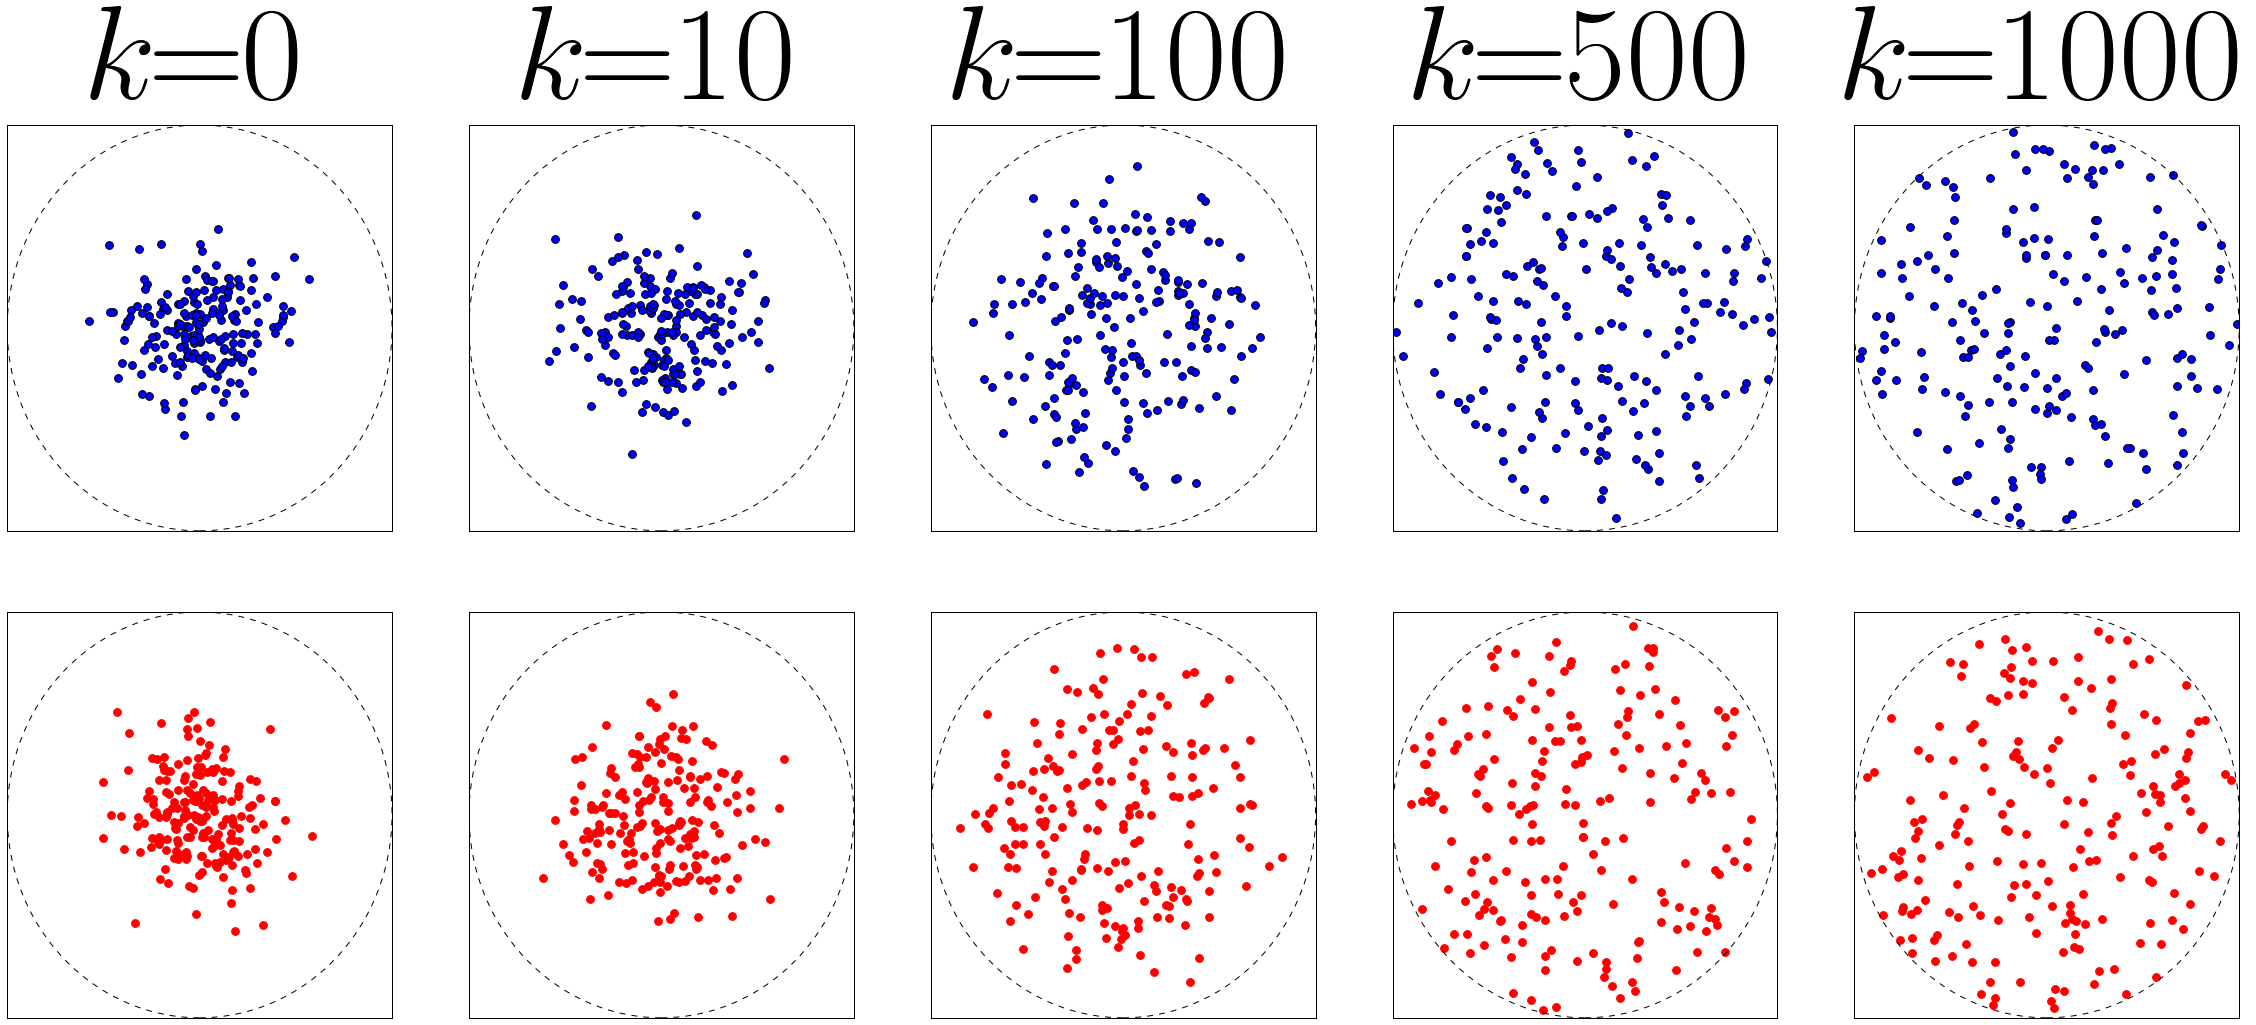

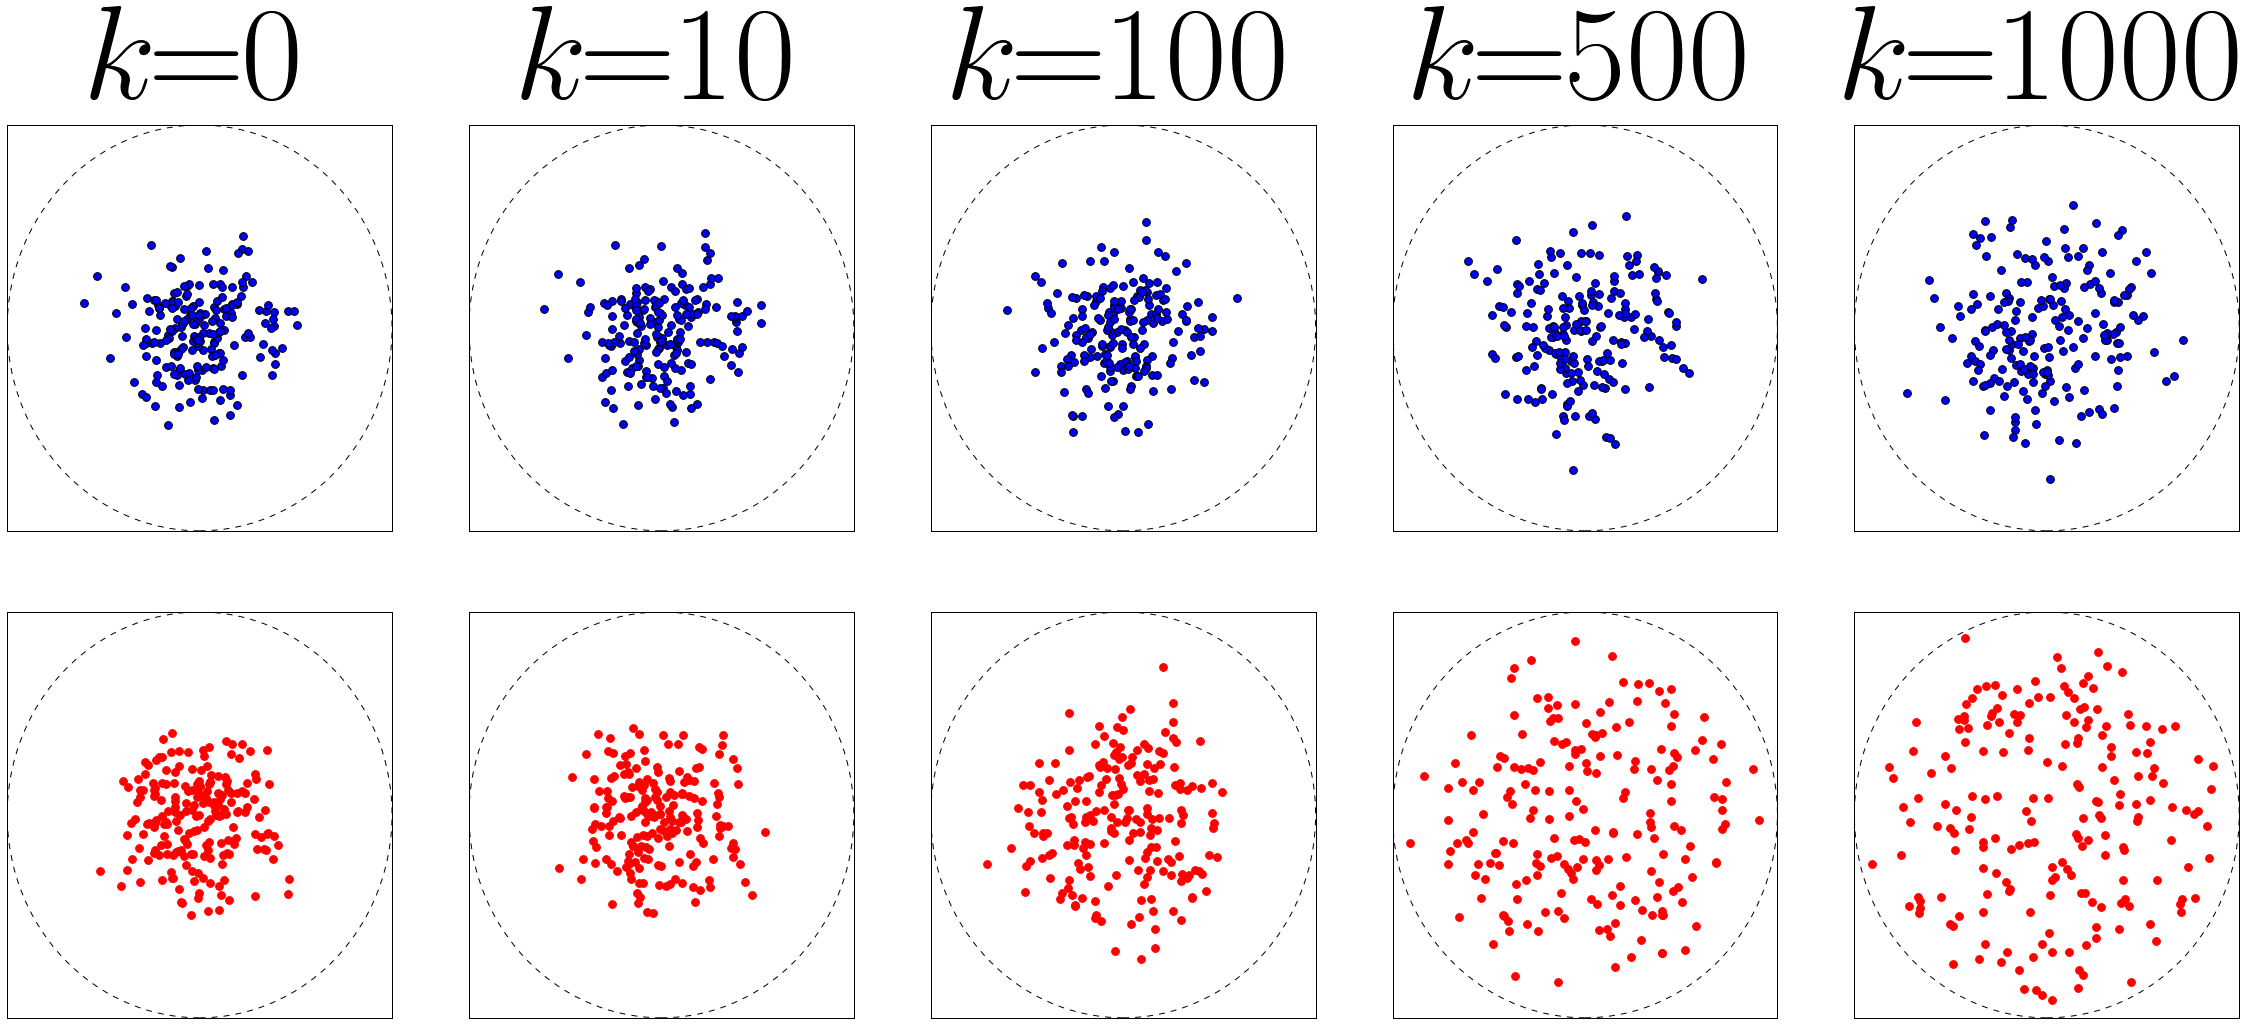

In [66]:
path = '/Users/raaz.rsk/Box Sync/2017/Martin/dikin-walk/figures/simulations/'
savfig = True
iter_plot = np.array([0, 10, 100, 500, 1000])
NUM_PLOT = 200
num_walks = 2
num_rows = num_walks*Nvals # one for dikin, vaidya uniform
# num_cols = len(iter_plot)+1 # iterations + uniform

num_rows = num_walks
num_cols =  len(iter_plot) # iterations + NO uniform

for index, rep in enumerate(Ns):
    fig = plt.figure(figsize = [num_cols*8, num_rows*8])
    for j, i in enumerate(iter_plot):
        A = As[index]
        b = bs[index]
        x = dikin_rvs[index, 1, 0:NUM_PLOT, i]
        y = dikin_rvs[index, 0, 0:NUM_PLOT, i]
        ax = fig.add_subplot(num_rows, num_cols, j+1)
        plot_A_b(A, b, xx, xlims, ylims)
        ax.scatter(x, y, s=s)
        axes = plt.gca()
        axes.set_xlim([-1.,1.])
        axes.set_ylim([-1.,1.])
        axes.set_xticks([])
        axes.set_yticks([])
        plt.title('$k\!\!=\!\!$ %d' % (i), fontsize=fs)
        ttl = ax.title
        ttl.set_position([.5, 1.05])
        
        x = vaidya_rvs[index, 1, 0:NUM_PLOT, i]
        y = vaidya_rvs[index, 0, 0:NUM_PLOT, i]
        ax = fig.add_subplot(num_rows, num_cols, num_cols + j+1)
        plot_A_b(A, b, xx, xlims, ylims)
        ax.scatter(x, y, color='r', s=s)
        axes = plt.gca()
        axes.set_xlim([-1.,1.])
        axes.set_ylim([-1.,1.])
        axes.set_xticks([])
        axes.set_yticks([])
    
    label = ('dikin_vaidya_circle_%d' % rep)
    if savfig:
        plt.savefig(path + label + '.pdf')
    plt.show()
    plt.close()



In [67]:
params = {'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

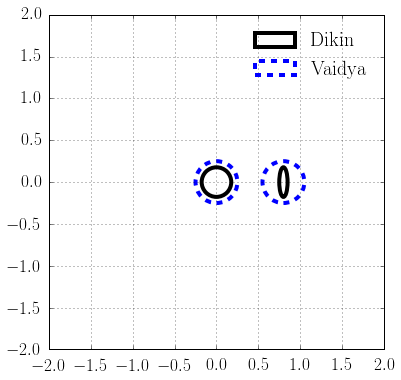

In [95]:
plt.figure(figsize=[6, 6])
circleD = plt.Circle((0, 0), 1/4./np.sqrt(2.), color='black', linewidth=4.,fill=False)
circleV = plt.Circle((0, 0), 1./np.sqrt(2.)/np.sqrt(8), color='blue', linewidth=4., linestyle='--', fill=False)

ellsD = Ellipse(xy=[0.8, 0], width=2/np.sqrt(2.)/np.sqrt(8), height=2/np.sqrt(2.)/np.sqrt(8), 
               linestyle='--', 
               color='blue', linewidth=4.,fill=False)
ellsV = Ellipse(xy=[0.8, 0], width=2/np.sqrt(404.93), height=2/4./np.sqrt(2.), 
               color='black', linewidth=4.,fill=False)



axes = plt.gca()
axes.set_xlim([-2.,2.])
axes.set_ylim([-2.,2.])

axes.grid('on')
axes.add_artist(circleD)
axes.add_artist(circleV)
axes.add_artist(ellsD)
axes.add_artist(ellsV)

# axes.set_xticks([])
# axes.set_yticks([])
plt.legend([circleD, circleV], ['Dikin', 'Vaidya'], fontsize=20., frameon=False)

label = ('dikin_vaidya_ellipsoids_64')
plt.savefig(path+label+'.pdf')
plt.show()

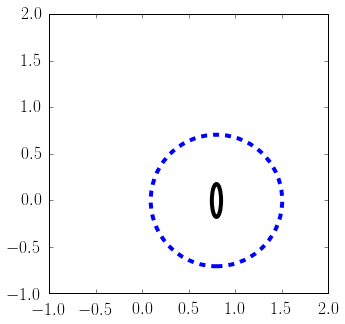

In [90]:
from matplotlib.patches import Ellipse
import numpy.random as rnd
NUM = 250

ellsD = Ellipse(xy=[0.8, 0], width=2/np.sqrt(2.), height=2/np.sqrt(2.), 
               linestyle='--', 
               color='blue', linewidth=4.,fill=False)
ellsV = Ellipse(xy=[0.8, 0], width=2/np.sqrt(404.93), height=2/4./np.sqrt(2.), 
               color='black', linewidth=4.,fill=False)



fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
ax.add_artist(ellsD)
ax.add_artist(ellsV)
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)

plt.show()

In [85]:
32/32 + 400/404.93 + 16./(1.8)**2/404.93

2.000020427246532